<a href="https://colab.research.google.com/github/mialdrid/Python/blob/master/MAldridge_v2_MSIS549_HW3_RNN_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSIS 579 HW3 RNN to Classify Reuters Topics

In this homework, we will train a recurrent neural network to Classify Reuters newswires into 46 Topics.

Dataset of 11,228 newswires from Reuters, labeled over 46 topics. As with the IMDB dataset, each wire is encoded as a sequence of word indexes (same conventions).

In [1]:
%tensorflow_version 1.14
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

from __future__ import print_function

import numpy as np
import keras
keras.__version__

!pip install numpy==1.16.1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


## Load Reuters Dataset

First let's load the Reuters dataset. Please refer to [this API page](https://keras.io/datasets/#reuters-newswire-topics-classification) for details on how to load the data.

In [2]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import preprocessing
from keras.preprocessing.text import Tokenizer

max_words = 10000
# (among top max_features most common words)
maxlen = 200
print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Loading data...


In [0]:
from keras.utils import np_utils # one hot encode the y-label
y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

## Task 1: Fully Connected Neural Networks

In this task, we will learn a word embedding layer as well as fully connected layers to classify Reuters newwires. Please refer to the lab code from lesson 4. Watch out the overfitting. 

In [4]:
# TODO
# Import model and layer types
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding
from keras import layers

model = Sequential()
# Add embedding layer and specify the max input length
model.add(Embedding(10000, 8, input_length=maxlen))
# Add additional model layers and define the activation function, optimizer and metrics
model.add(Flatten())
#model.add(Dense(64, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               819712    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                23598     
Total params: 923,310
Trainable params: 923,310
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Fit the model
history = model.fit(
    x_train, 
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 4s 515us/step - loss: 1.9961 - accuracy: 0.4771 - val_loss: 1.6422 - val_accuracy: 0.5843
Epoch 2/10
7185/7185 [==============================] - 4s 494us/step - loss: 1.4491 - accuracy: 0.6405 - val_loss: 1.4337 - val_accuracy: 0.6455
Epoch 3/10
7185/7185 [==============================] - 4s 492us/step - loss: 1.1046 - accuracy: 0.7253 - val_loss: 1.3167 - val_accuracy: 0.6828
Epoch 4/10
7185/7185 [==============================] - 4s 492us/step - loss: 0.8211 - accuracy: 0.7999 - val_loss: 1.3473 - val_accuracy: 0.6967
Epoch 5/10
7185/7185 [==============================] - 3s 476us/step - loss: 0.6113 - accuracy: 0.8532 - val_loss: 1.3926 - val_accuracy: 0.7028
Epoch 6/10
7185/7185 [==============================] - 3s 477us/step - loss: 0.4516 - accuracy: 0.8928 - val_loss: 1.5055 - val_accuracy: 0.7062
Epoch 7/10
7185/7185 [==============================] - 4s 491us/step - loss

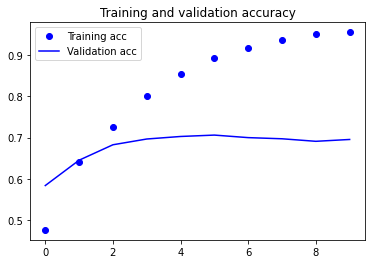

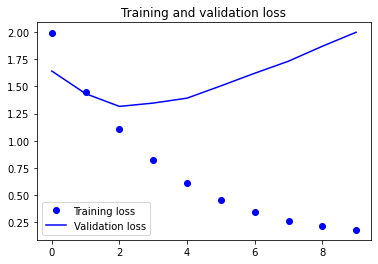

In [6]:
# Plot the model results and assess for over/under fitting trends
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


In [7]:
# Re-fit the model with a lower amount of epochs to lessen the effects of overfitting.
history = model.fit(
    x_train, 
    y_train,
    epochs=3,
    batch_size=32,
    validation_split=0.2
)

Train on 7185 samples, validate on 1797 samples
Epoch 1/3
7185/7185 [==============================] - 4s 516us/step - loss: 0.1491 - accuracy: 0.9602 - val_loss: 2.1133 - val_accuracy: 0.6867
Epoch 2/3
7185/7185 [==============================] - 4s 502us/step - loss: 0.1429 - accuracy: 0.9601 - val_loss: 2.2093 - val_accuracy: 0.6856
Epoch 3/3
7185/7185 [==============================] - 4s 500us/step - loss: 0.1395 - accuracy: 0.9617 - val_loss: 2.2344 - val_accuracy: 0.6878


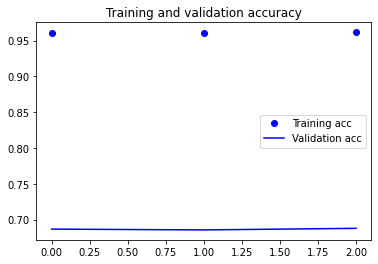

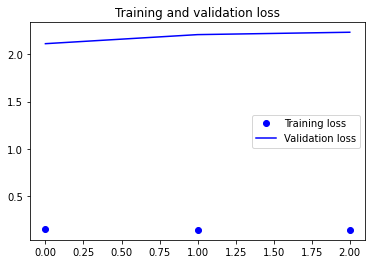

In [8]:
#Re-plot the results to assess the changes
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

## Task 2: RNN/LSTM
Now, we have a fully connected neural networks trained for prediction topics in Reuters data. In this task, we will swap out the fully connect layers and replace with a more powerful RNN layers (LSTM, GRU). Try experiment with different RNN layers and see if they can help improve the model performance.

In [9]:
# TODO
# Import the model and layers
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_features = 10000  # = the  number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features, test_split=0.2)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)


In [0]:
#once again, we need to one hot encode labes
from keras.utils import np_utils
one_hot_train_labels = np_utils.to_categorical(y_train)
one_hot_test_labels = np_utils.to_categorical(y_test)

#train test
partial_x_train = input_train

partial_y_train = one_hot_train_labels

#train test
x_test = input_test

y_test = one_hot_test_labels

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
from keras.layers import LSTM
# Build the model and added layers; define the activation function, optimizer and metrics
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    partial_x_train, 
    partial_y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

Train on 7185 samples, validate on 1797 samples
Epoch 1/5
7185/7185 [==============================] - 43s 6ms/step - loss: 2.6749 - accuracy: 0.3439 - val_loss: 2.3213 - val_accuracy: 0.4747
Epoch 2/5
7185/7185 [==============================] - 43s 6ms/step - loss: 2.1960 - accuracy: 0.4646 - val_loss: 2.1882 - val_accuracy: 0.3962
Epoch 3/5
7185/7185 [==============================] - 42s 6ms/step - loss: 1.9864 - accuracy: 0.4987 - val_loss: 1.9376 - val_accuracy: 0.4886
Epoch 4/5
7185/7185 [==============================] - 43s 6ms/step - loss: 1.8244 - accuracy: 0.5264 - val_loss: 1.8217 - val_accuracy: 0.5298
Epoch 5/5
7185/7185 [==============================] - 44s 6ms/step - loss: 1.6741 - accuracy: 0.5628 - val_loss: 1.7195 - val_accuracy: 0.5487


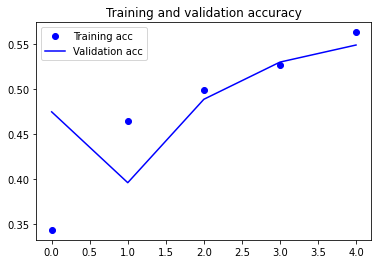

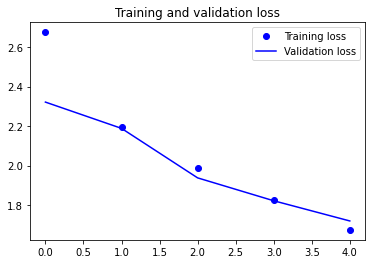

In [12]:
# plot the results and assess for under/overfitting trends
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 3: Use a Pre-trained Word Embedding

In this task, instead of learning the word embedding layer from scratch, we apply a pre-trained word embedding layer and only use the classification base for reuters data. Please refer to the [API](https://keras.io/examples/pretrained_word_embeddings/) for different pre-trained word embedding.

Does the pre-trained word embedding help improve the model prediction?


In [4]:
import os
import shutil
import zipfile
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant

!wget --no-check-certificate \
    "http://nlp.stanford.edu/data/glove.6B.zip" \
    -O "/tmp/glove.6B.zip"

local_zip = '/tmp/glove.6B.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.infolist()

--2020-05-09 17:30:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-05-09 17:30:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-05-09 17:30:23--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’

/t

[<ZipInfo filename='glove.6B.50d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=171350079 compress_size=69182485>,
 <ZipInfo filename='glove.6B.100d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=347116733 compress_size=134300389>,
 <ZipInfo filename='glove.6B.200d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=693432828 compress_size=264336891>,
 <ZipInfo filename='glove.6B.300d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=1037962819 compress_size=394362180>]

In [0]:
# Import model, layering and other APIs
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

EMBEDDING_DIM = 100


In [7]:
print('Indexing word vectors.')
# Loop through word vectors
embeddings_index = {}
with open(os.path.join('/tmp/glove.6B.100d.txt')) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [8]:
print('Preparing embedding matrix.')

# prepare embedding matrix

num_words = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= max_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# Add the pre-trained word embeddings into a layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)

Preparing embedding matrix.


In [9]:

print('Training model.')

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(maxlen,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x=(Dropout(0.5))(embedded_sequences)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(46, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_split=0.2)

Training model.
Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 15s 2ms/step - loss: 2.3500 - acc: 0.3836 - val_loss: 2.2600 - val_acc: 0.3484
Epoch 2/10
7185/7185 [==============================] - 15s 2ms/step - loss: 2.0670 - acc: 0.4600 - val_loss: 2.0569 - val_acc: 0.4725
Epoch 3/10
7185/7185 [==============================] - 15s 2ms/step - loss: 1.9865 - acc: 0.4668 - val_loss: 2.0723 - val_acc: 0.4908
Epoch 4/10
7185/7185 [==============================] - 15s 2ms/step - loss: 1.9212 - acc: 0.4792 - val_loss: 1.8947 - val_acc: 0.4964
Epoch 5/10
7185/7185 [==============================] - 15s 2ms/step - loss: 1.8693 - acc: 0.5041 - val_loss: 1.8210 - val_acc: 0.5214
Epoch 6/10
7185/7185 [==============================] - 15s 2ms/step - loss: 1.8114 - acc: 0.5187 - val_loss: 2.0516 - val_acc: 0.4140
Epoch 7/10
7185/7185 [==============================] - 15s 2ms/step - loss: 1.7566 - acc: 0.5307 - val_loss: 1.8575 - val_acc

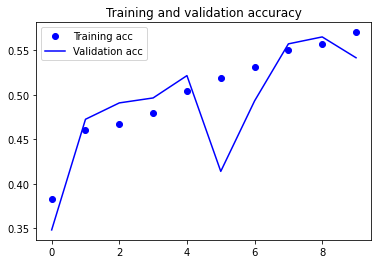

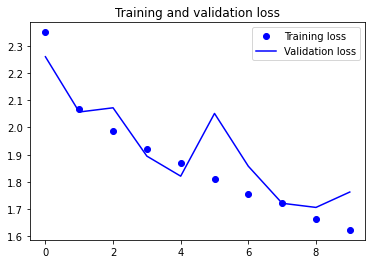

In [10]:
# Plot the model results to assess for over/under fitting
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


In [0]:
test_eval = model.evaluate(x_test, y_test, verbose=0)

In [12]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.7954947787103968
Test accuracy: 0.529830813407898


The pre-trained model did not substantially improve the model prediction - the test accuracy is .52. Additionally, increasing the Epochs increases the risk of overfitting the model. The size of the training data set may be the issue here.